In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collect_functions import *
from constants import *

## Dowload data

In [161]:
def download_data():
    !aws s3 cp s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/ data --recursive

In [162]:
download_data()

download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/D4uiUJ/EgKY/INHCGj/zbg==.json to data/D4uiUJ/EgKY/INHCGj/zbg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/9NCR9oSFZxSzqbvFXGbv1g==.json to data/9NCR9oSFZxSzqbvFXGbv1g==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json to data/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/2ujw70BpDdTGzp/TN/RL5g==.json to data/2ujw70BpDdTGzp/TN/RL5g==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/HVDLf2r0y7Gy2fVNe+f8cA==.json to data/HVDLf2r0y7Gy2fVNe+f8cA==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/I7dtH9Sb/iLwLJilcnuhag==.json to data/I7dtH9Sb/iLwLJilcnuhag==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/RFtMyPZjobEQnT8hwPhL0w==.json to data/RFtMyPZjobEQnT8hwPhL0w==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d1717

## Collect data in dataframes

In [51]:
df_features, df_answers, df_generals = collect_all(agg_features="mean", agg_survey=False)

In [52]:
NB_PARTICIPANTS = len(df_generals)
print("We had {0} participations".format(NB_PARTICIPANTS))

We had 22 participations


In [53]:
df_features.head(6)

nb_timestamps     smile  innerBrowRaise  browRaise  \
user_id video_id                                                       
0       1                  1146  0.055846        0.810646   0.335079   
        2                   861  0.000000        1.608595   0.045296   
        3                  1004  0.000000        1.870518   1.112550   
1       1                  1686  1.989917        0.069988   1.348754   
        2                  1240  0.000000        0.590323   0.006452   
        3                  1379  0.000000        0.064540   0.386512   

                  browFurrow  noseWrinkle  upperLipRaise  lipCornerDepressor  \
user_id video_id                                                               
0       1           0.062827     0.000000            0.0            0.000000   
        2           0.018583     0.000000            0.0            0.024390   
        3           0.143426     0.003984            0.0            0.051793   
1       1           0.010083     0.000000            0.0            0.000000   
        2           0.000000     0.000000            0.0            0.000000   
        3           0.000000     0.000000            0.0            0.000000   

                  chinRaise  lipPucker  ...  mouthOpen     smirk  eyeClosure  \
user_id video_id                        ...                                    
0       1          0.863874   1.273997  ...   0.000873  1.801047    0.032286   
        2          0.178862   4.610918  ...   0.000000  0.000000    0.000000   
        3          4.848606   0.988048  ...   0.539841  9.770916    0.031873   
1       1          0.000000   0.191578  ...   0.000000  0.000000    0.140569   
        2          0.000000   0.007258  ...   0.000000  0.000000    0.061290   
        3          0.000000   0.000000  ...   0.129079  0.000000    0.133430   

                  attention  lidTighten   jawDrop   dimpler   eyeWiden  \
user_id video_id                                                         
0       1         97.746946    0.000000  0.369983  0.150960   0.000000   
        2         98.118467    0.000000  0.033682  1.006969   0.000000   
        3         98.261952    0.008964  0.112550  3.790837   0.000000   
1       1         96.727758    0.033808  0.000000  0.107948  52.913405   
        2         97.872581    0.177419  0.008871  0.000000  25.097581   
        3         96.623640    0.002901  0.203046  0.007977  85.615664   

                  cheekRaise  lipStretch  
user_id video_id                          
0       1           0.173647    0.081152  
        2           0.009292    0.000000  
        3           0.077689    3.300797  
1       1           0.008897    0.187426  
        2           0.001613    0.000000  
        3           0.000000    0.000000  

[6 rows x 22 columns]

In [54]:
df_answers.head(6)

fake/natural  stagnant/lively  inert/interactive  \
user_id video_id                                                     
0       1.0                4.0              3.0                2.0   
        2.0                2.0              3.0                3.0   
        3.0                3.0              4.0                4.0   
1       1.0                4.0              4.0                3.0   
        2.0                3.0              4.0                4.0   
        3.0                3.0              3.0                5.0   

                  unconscious/conscious  incompetent/competent  \
user_id video_id                                                 
0       1.0                         2.0                    4.0   
        2.0                         2.0                    3.0   
        3.0                         4.0                    4.0   
1       1.0                         3.0                    5.0   
        2.0                         2.0                    4.0   
        3.0                         4.0                    4.0   

                  unintelligent/intelligent  mechanical/organic  \
user_id video_id                                                  
0       1.0                             3.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             4.0                 3.0   
1       1.0                             3.0                 1.0   
        2.0                             4.0                 3.0   
        3.0                             5.0                 4.0   

                  unresponsive/responsive  foolish/sensible  \
user_id video_id                                              
0       1.0                           4.0               4.0   
        2.0                           3.0               4.0   
        3.0                           4.0               4.0   
1       1.0                           4.0               4.0   
        2.0                           4.0               4.0   
        3.0                           4.0               4.0   

                  ignorant/knowledgeable  machinelike/humanlike  \
user_id video_id                                                  
0       1.0                          3.0                    1.0   
        2.0                          3.0                    1.0   
        3.0                          4.0                    3.0   
1       1.0                          3.0                    1.0   
        2.0                          3.0                    2.0   
        3.0                          4.0                    3.0   

                  artificial/lifelike  dead/alive  unpleasant/pleasant  \
user_id video_id                                                         
0       1.0                       2.0         2.0                  4.0   
        2.0                       1.0         2.0                  2.0   
        3.0                       4.0         4.0                  3.0   
1       1.0                       1.0         3.0                  5.0   
        2.0                       2.0         4.0                  4.0   
        3.0                       3.0         4.0                  3.0   

                  ridig/smooth  dislike/like  irresponsible/responsible  \
user_id video_id                                                          
0       1.0                4.0           2.0                        5.0   
        2.0                2.0           2.0                        4.0   
        3.0                3.0           4.0                        4.0   
1       1.0                5.0           5.0                        4.0   
        2.0                4.0           4.0                        3.0   
        3.0                4.0           3.0                        3.0   

                  awful/nice  unfriendly/friendly  unkind/kind  
user_id video_id                                                
0       1.0              

In [55]:
df_generals.head(3)

,age,gender,robotRealLife
user_id,,,
0,29,Male,1
1,32,Male,0
2,21,Male,1


## Data cleaning and analysis

In [60]:
# minimum lenght of the time series for proper analysis
threshold = 100
# number of non-meaning full videos
df_features[df_features.nb_timestamps < 100].nb_timestamps.count()

# TODO remove such videos, and their corresponding answers in the survey

4

### Features for each video and user

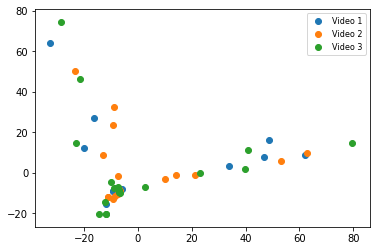

In [13]:
X = df_features.values[:,1:]
pca = PCA(n_components=2)
y = pca.fit_transform(X)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()

### Answers for each video and user

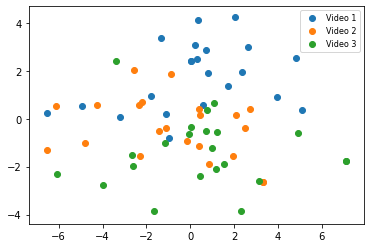

In [15]:
X = df_answers.values
pca = PCA(n_components=2)
y = pca.fit_transform(X)
colors = df_answers.index.get_level_values(1)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()